# Koreliacija COVID-19 pandemijos metu
> BTC ir ETH koreliacija su rinkomis pandemijos metu.

- toc: true 
- badges: true
- comments: false
- categories: [Dominykas Tautkus]
- image: images/BTC_price.png

In [1]:
#hide
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objects as go
import pandas as pd
import plotly.express as px
from scripts.read_data import read_api
from scripts.read_data import read_news
from scripts.read_data import read_covid
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import seaborn as sns 
from IPython.display import Markdown as md
sns.set()

In [2]:
#hide
df_all = read_api()
#df_all.index.name = 'date'

df_all.index = pd.to_datetime(df_all.index)
df_covid = df_all.loc[df_all.index > '2019-12-31 08:00:00']
df_covid = df_covid[['ETH', 'BTC', 'XAU', 'SP500']]
#df_covid = df_covid[['ETH', 'BTC', 'XAU']] ;

In [3]:
#hide
market = read_news('market')
covid = read_covid() ;

### Šios dienos kriptovaliutų ir pandemijos naujienos

In [4]:
#hide_input
#md('##### {}'.format(titleBTC)) 
md("- {}{} {}{} [| Skaityti daugiau]({}) ".format(market['title'],'. ', market['body'], ' ...', market['url']))

- Chainlink price analysis: LINK stuck in bearish headwinds as $6 support looks shaky.  Chainlink price analysis is bullish today, following the recent breakout above $6. The LINK/USD pair is now trading at $6.72 and facing resistance at $7.5. On the other hand, prices have support at $5.4. A break below this level could see LINK/USD drop to $4.8. The LINK/USD pair is now trading at $6.72 and facing &#8230;  Chainlink price analysis: LINK stuck in bearish headwinds as $6 support looks shaky Read More &#187; ... [| Skaityti daugiau](https://www.cryptopolitan.com/chainlink-price-analysis-2022-07-20-2/) 

In [5]:
#hide_input
#md('##### {}'.format(titleETH)) 
md("- {}{} {}{} [| Skaityti daugiau]({}) ".format(covid['title'],'. ', covid['description'], ' ...', covid['url']))

- Brexit red tape: Bookings of UK musicians at EU’s biggest festivals crash by 45%.  Exclusive: Figures seen as clear evidence of impact of ‘dud deal’ – now touring has recovered from Covid ... [| Skaityti daugiau](http://www.independent.co.uk/news/uk/politics/brexit-red-tape-musicians-elton-john-b2127653.html) 

### Kainų kaita pandemijos metu

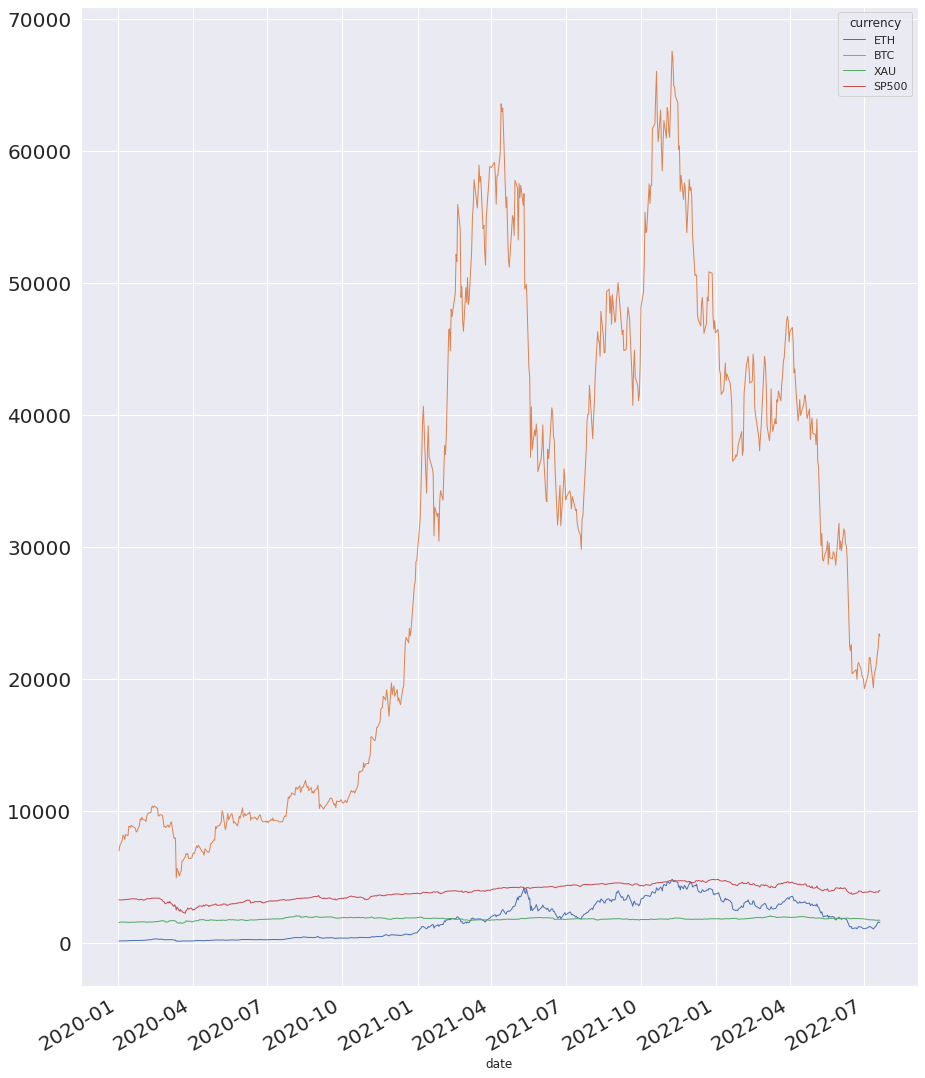

In [6]:
#hide_input
df_covid.plot(figsize=(15,20), linewidth=1, fontsize=20) ;
# plt.savefig('covid-price.eps', format='eps')

### Koreliacija pandemijos metu 

Koreliacijos koeficiento (Spirmano r) matrica.

In [7]:
#hide_input
df_covid.corr()  

currency,ETH,BTC,XAU,SP500
currency,,,,
ETH,1.000000,0.903322,0.248503,0.920605
BTC,0.903322,1.000000,0.198355,0.866359
XAU,0.248503,0.198355,1.000000,0.375622
SP500,0.920605,0.866359,0.375622,1.000000


In [8]:
#hide ### Koreliacijos matrica.

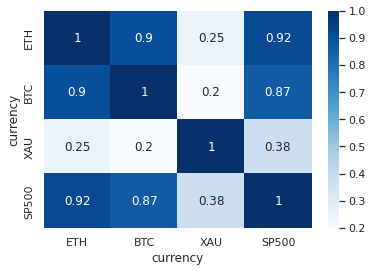

In [9]:
#hide
sns.heatmap(df_covid.corr(), annot=True, cmap="Blues") ;
# plt.savefig('covid.eps', format='eps')